Dataset Shape: (200, 5)


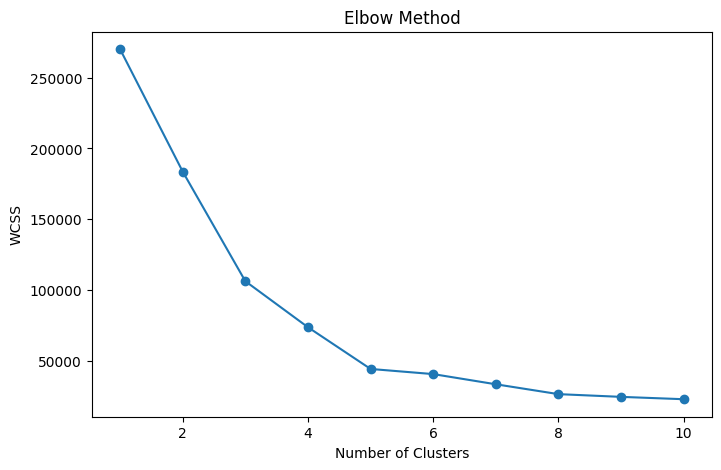

Optimal K seems to be 5 based on the plot.
✅ Success! Model saved to 'models/kmeans_model.pkl'


In [1]:
# %% [markdown]
# # Project 3: Customer Segmentation (Clustering)
# **Objective:** Group customers based on Annual Income and Spending Score.

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import joblib
import os

# %%
# 1. Load Data (Fixed URL)
# We use a more stable repository for the Mall Customers dataset
url = "https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv"
df = pd.read_csv(url)

# Rename columns for clarity (remove spaces and special chars)
df = df.rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'Score'
})

print("Dataset Shape:", df.shape)
df.head()

# %%
# 2. Select Features
X = df[['Income', 'Score']]

# %%
# 3. Determine Optimal Clusters (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow (Optional visualization in notebook)
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

print("Optimal K seems to be 5 based on the plot.")

# %%
# 4. Train K-Means with K=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X)

# %%
# 5. Save Model
if not os.path.exists('models'):
    os.makedirs('models')

joblib.dump(kmeans, 'models/kmeans_model.pkl')
print("✅ Success! Model saved to 'models/kmeans_model.pkl'")